## Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams

import sklearn as sk
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import datasets

## Setting up the data

In [2]:
data = datasets.load_iris()
df = DataFrame(data['data'], columns=data['feature_names'])

In [3]:
df['class'] = data.target

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## EDA

<Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>

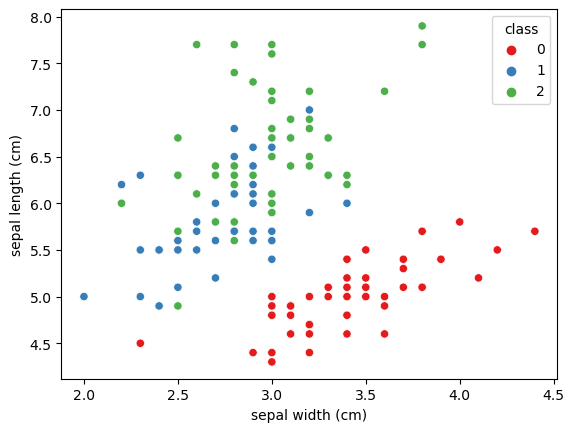

In [5]:
sb.scatterplot(x=df['sepal width (cm)'], y=df['sepal length (cm)'], hue=df['class'], palette='Set1')

### Splitting the data into Input and Output Features

In [6]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=10)

## Implementation of KNN Algo using Numpy and Pandas

In [7]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

In [8]:
class KNeighbours:
    
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        predicted_labels = [self.__predict_helper__(x) for x in X]
        return predicted_labels
    
    def __predict_helper__(self, x):
        # Compute Distances
        distances = [euclidean_distance(x, xTrain) for xTrain in self.X_train]
        
        # Get K Nearest Samples
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_indices = [self.y_train[i] for i in k_indices]
        
        # Compute the Majority
        most_common = Counter(k_nearest_indices).most_common(1)
        return most_common[0][0]

In [9]:
def accuracy(y_test, y_preds):
    return np.sum(y_test == y_preds) / len(y_test)

## Model Fitting and Evaluation

In [10]:
knn = KNeighbours(k=3)
knn.fit(X_train.values, y_train.values)

In [11]:
preds = knn.predict(X_test.values)

In [12]:
accuracy(y_test, preds)

0.9736842105263158

In [13]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.97        15
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38

